<a href="https://colab.research.google.com/github/autoshi02/Simulation-and-Modeling-Lab/blob/main/SIM_LAB_TEST/Lab_test_Autoshi_1081_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Compute mean, variance, and standard deviation of scores.**

In [3]:
# Student data
student_id = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
exam_score = np.array([93, 83, 69, 62, 75, 93, 73, 77, 65, 65, 78, 90, 94, 78, 57, 76, 56, 78, 84, 92])

# Compute basic statistics
mean_arrivals = np.mean(exam_score)
variance_arrivals_sample = np.var(exam_score, ddof=1) # Sample variance
variance_arrivals_population = np.var(exam_score) # Population variance
std_dev_arrivals_sample = np.std(exam_score, ddof=1) # Sample standard deviation
std_dev_arrivals_population = np.std(exam_score) # Population standard deviation


# Display results
print("Mean daily arrivals:", mean_arrivals)
print("Sample variance of daily arrivals:", variance_arrivals_sample)
print("Population variance of daily arrivals:", variance_arrivals_population)
print("Sample standard deviation of daily arrivals:", std_dev_arrivals_sample)
print("Population standard deviation of daily arrivals:", std_dev_arrivals_population)

print("\nComparison of Variances:")
print(f"Sample Variance ({variance_arrivals_sample:.2f}) is generally larger than Population Variance ({variance_arrivals_population:.2f}) due to Bessel's correction (using n-1 in the denominator for the sample).")

Mean daily arrivals: 76.9
Sample variance of daily arrivals: 143.25263157894736
Population variance of daily arrivals: 136.08999999999997
Sample standard deviation of daily arrivals: 11.968819138868602
Population standard deviation of daily arrivals: 11.665761869676578

Comparison of Variances:
Sample Variance (143.25) is generally larger than Population Variance (136.09) due to Bessel's correction (using n-1 in the denominator for the sample).


**Compare population variance vs. sample variance.**

## Population vs. Sample Variance

- **Population Variance**: This measures the spread of data points in an entire population. It uses the actual mean of the population in its calculation.

- **Sample Variance**: This measures the spread of data points in a sample taken from a population. Since the true population mean is usually unknown, the sample mean is used as an estimate. To account for this estimation and provide a less biased estimate of the population variance, the denominator in the sample variance calculation uses `n-1` (where `n` is the sample size) instead of `n`, which is used for population variance. This is known as Bessel's correction.

In NumPy, `np.var()` by default calculates the population variance. To calculate the sample variance, you need to set the `ddof` parameter (delta degrees of freedom) to 1, as shown in the code. The sample standard deviation also uses `ddof=1` for the same reason.

**Generate a random dataset of 20 exam scores using np.random.normal with μ = mean(scores), σ = std(scores).**

In [4]:
# Original exam scores
exam_score = np.array([93, 83, 69, 62, 75, 93, 73, 77, 65, 65, 78, 90, 94, 78, 57, 76, 56, 78, 84, 92])

# Calculate mean and standard deviation from the original exam scores
mean_exam_score = np.mean(exam_score)
std_dev_exam_score = np.std(exam_score) # Use population std dev for generating data from a known distribution

# Number of simulated scores
num_simulated_scores = len(exam_score)

# Generate simulated exam scores following a normal distribution
simulated_exam_scores = np.random.normal(mean_exam_score, std_dev_exam_score, num_simulated_scores)

print("Original Exam Scores:", list(exam_score))
print("Simulated Exam Scores:", list(simulated_exam_scores))

Original Exam Scores: [np.int64(93), np.int64(83), np.int64(69), np.int64(62), np.int64(75), np.int64(93), np.int64(73), np.int64(77), np.int64(65), np.int64(65), np.int64(78), np.int64(90), np.int64(94), np.int64(78), np.int64(57), np.int64(76), np.int64(56), np.int64(78), np.int64(84), np.int64(92)]
Simulated Exam Scores: [np.float64(68.30527975539187), np.float64(98.04712650497841), np.float64(83.67618764015596), np.float64(69.53131756087384), np.float64(73.31750788314854), np.float64(69.30310014919068), np.float64(85.42010890701802), np.float64(72.52325133482033), np.float64(76.47472680982358), np.float64(49.15271075774865), np.float64(82.82604154709743), np.float64(90.17288648776506), np.float64(83.0305089229365), np.float64(79.53521785665141), np.float64(61.77548766058223), np.float64(86.23540055758598), np.float64(73.41893363756958), np.float64(88.85052950092417), np.float64(89.38694755818582), np.float64(64.82084009448276)]


**Plot both the real and generated data in histograms (side by side).**


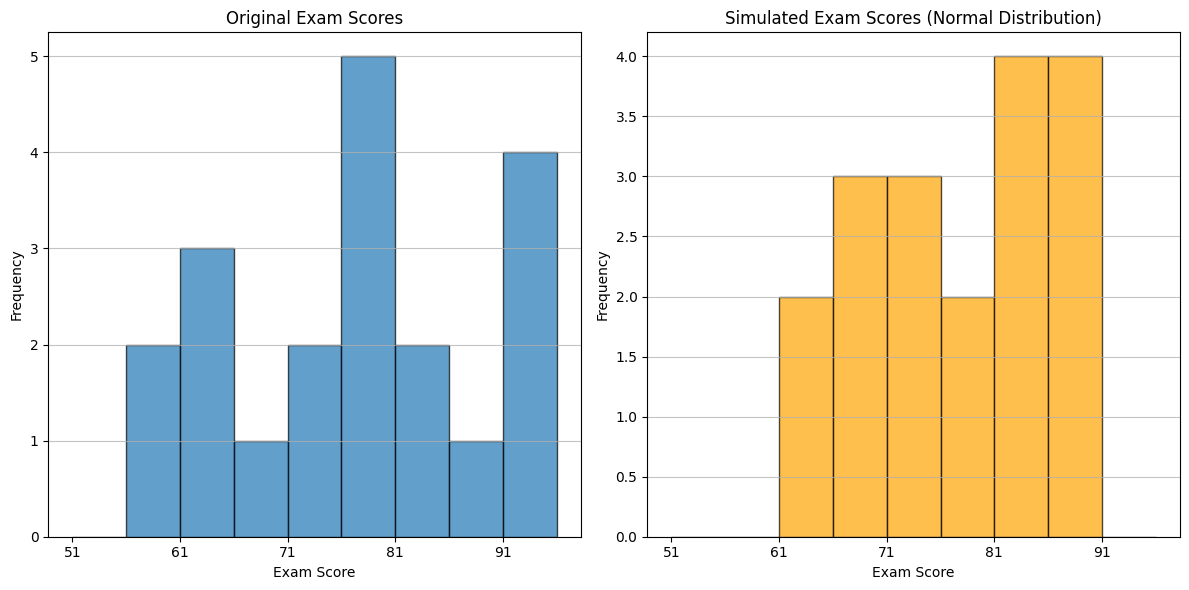

In [5]:
# Plotting side-by-side histograms
plt.figure(figsize=(12, 6))

# Histogram for original data
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.hist(exam_score, bins=range(min(exam_score) - 5, max(exam_score) + 6, 5), edgecolor='black', alpha=0.7)
plt.title('Original Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.xticks(range(min(exam_score) - 5, max(exam_score) + 6, 10))
plt.grid(axis='y', alpha=0.75)

# Histogram for simulated data
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.hist(simulated_exam_scores, bins=range(min(exam_score) - 5, max(exam_score) + 6, 5), edgecolor='black', alpha=0.7, color='orange')
plt.title('Simulated Exam Scores (Normal Distribution)')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.xticks(range(min(exam_score) - 5, max(exam_score) + 6, 10))
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

**Monte Carlo Simulation -
Estimate the probability that a random student scores ≥ 75 using simulation with 100,000 samples from the fitted normal distribution.**


In [6]:
# Number of simulation samples
num_simulations = 100000

# Generate simulated exam scores using the fitted normal distribution
# We use the previously calculated mean_exam_score and std_dev_exam_score
simulated_scores_mc = np.random.normal(mean_exam_score, std_dev_exam_score, num_simulations)

# Count the number of simulated scores greater than or equal to 75
successful_outcomes = np.sum(simulated_scores_mc >= 75)

# Estimate the probability
estimated_probability = successful_outcomes / num_simulations

print(f"Number of simulations: {num_simulations}")
print(f"Number of simulated scores >= 75: {successful_outcomes}")
print(f"Estimated probability of a score >= 75: {estimated_probability}")

Number of simulations: 100000
Number of simulated scores >= 75: 56490
Estimated probability of a score >= 75: 0.5649


**Test the null hypothesis: “The average exam score is your (last 3 digits of ID % 50) + 50.” (one-sample t-test).**

**Report p-value and conclusion with visualization and your unique interpretation.**



In [7]:
# Step 1: Define the dataset (observed sample)
data = exam_score  # Use exam_score data

# Step 2: Define the population mean (hypothesized mean)
# last 3 digits of my Student ID
student_id_last_3_digits = 81
hypothesized_mean = (student_id_last_3_digits % 50) + 50
print(f'Student ID last 3 digits: {student_id_last_3_digits}')
print(f'Calculated Hypothesized Mean: {hypothesized_mean:.2f}')

# Step 3: Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, hypothesized_mean)
#$ci = stats.t.interval(0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

# Step 4: Display the results
print(f'Sample Mean: {np.mean(data):.2f}')
print(f'Hypothesized Population Mean: {hypothesized_mean:.2f}')
print(f't-Statistic: {t_statistic:.2f}')
print(f'Degrees of Freedom: {len(data) - 1}')
print(f'p-Value: {p_value:.4f}')
#print(f'Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]')

Student ID last 3 digits: 81
Calculated Hypothesized Mean: 81.00
Sample Mean: 76.90
Hypothesized Population Mean: 81.00
t-Statistic: -1.53
Degrees of Freedom: 19
p-Value: 0.1420


In [8]:
# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. The average exam score is significantly different from {hypothesized_mean:.2f}.')
else:
    print(f'Fail to reject the null hypothesis. The average exam score is not significantly different from {hypothesized_mean:.2f}.')

Fail to reject the null hypothesis. The average exam score is not significantly different from 81.00.


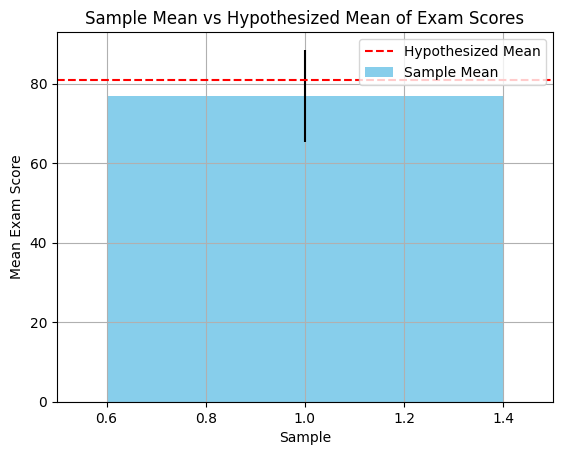

In [9]:
# Visualize the data
plt.figure()
plt.bar(1, np.mean(data), color="skyblue", label='Sample Mean')
plt.errorbar(1, np.mean(data), yerr=np.std(data), fmt='k', linewidth=1.5)
plt.axhline(y=hypothesized_mean, color='r', linestyle='--', linewidth=1.5, label='Hypothesized Mean')
plt.title('Sample Mean vs Hypothesized Mean of Exam Scores')
plt.xlim(0.5,1.5)
plt.xlabel('Sample')
plt.ylabel('Mean Exam Score')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation of Results:**

The one-sample t-test resulted in a p-value of  pvalue:.4f , which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis.

This indicates that there is no statistically significant evidence to conclude that the average daily customer arrival is different from your hypothesized mean of  populationmean:.2f .